Cat and Dog

- Simple CNN

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
import os
import random

from random import shuffle

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [2]:
seed_num = 42
np.random.seed(seed_num)
random.seed(seed_num)
tf.random.set_seed(seed_num)

In [3]:
TRAIN_DIR = './training_set/'
TEST_DIR = './test_set/'
IMG_SIZE = 64,64

In [4]:
image_names = []
data_labels = []
data_images = []

In [5]:
for folder in os.listdir(TRAIN_DIR):
    for file in os.listdir(os.path.join(TRAIN_DIR,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(TRAIN_DIR,folder,file))
            data_labels.append(folder)
            img = cv2.imread(os.path.join(TRAIN_DIR,folder,file))
            im = cv2.resize(img,IMG_SIZE)
            data_images.append(im)
        else:
            continue

In [6]:
test_image_names = []
test_data_labels = []
test_data_images = []

In [7]:
for folder in os.listdir(TEST_DIR):
    for file in os.listdir(os.path.join(TEST_DIR,folder)):
        if file.endswith("jpg"):
            test_image_names.append(os.path.join(TEST_DIR,folder,file))
            test_data_labels.append(folder)
            img = cv2.imread(os.path.join(TEST_DIR,folder,file))
            im = cv2.resize(img,IMG_SIZE)
            test_data_images.append(im)
        else:
            continue

In [8]:
data = np.array(data_images)
test_data = np.array(test_data_images)

In [9]:
le = LabelEncoder()
label = le.fit_transform(data_labels)
test_label = le.fit_transform(test_data_labels) 

In [10]:
X_train,X_val,y_train,y_val=train_test_split(data,label,test_size=0.20,random_state=42)

print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

X_train shape (6404, 64, 64, 3)
X_test shape (1601, 64, 64, 3)
y_train shape (6404,)
y_test shape (1601,)


In [11]:
classifier=Sequential()
classifier.add(Conv2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Dropout(0.5))
classifier.add(Flatten())
classifier.add(Dense(units= 128, activation='relu'))
classifier.add(Dense(units= 1, activation='sigmoid'))
classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 21, 21, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 410,753
Trainable params: 410,753
Non-trainable params: 0
__________________________________________________

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_datagen.fit(X_train)

In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(test_data)

In [14]:
batch_size = 32
steps_per_epoch = len(X_train)
validation_steps = len(y_val)

history = classifier.fit_generator(
    train_datagen.flow(X_train,y_train, batch_size = batch_size),
    steps_per_epoch = steps_per_epoch,
    epochs = 5,
    verbose = 2,
    validation_data = (X_val,y_val),
    validation_steps = validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimen

In [15]:
classifier.save_weights('model.h5')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


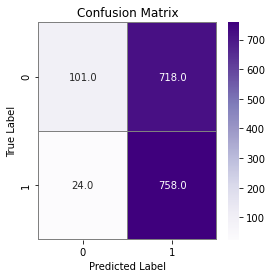

In [16]:
pred = classifier.predict_classes(X_val)
cm = confusion_matrix(y_val,pred)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths = 0.01,cmap="Purples",linecolor = "gray", fmt = '.1f',ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [17]:
test_loss, test_acc = classifier.evaluate(test_data, test_label)

64/64 [==============================] - 0s 1ms/step - loss: 71.5716 - accuracy: 0.5472


---

- Improved CNN

In [18]:
TRAIN_DIR = './training_set/'
TEST_DIR = './test_set/'
IMG_SIZE = 64,64

In [19]:
image_names = []
data_labels = []
data_images = []

In [20]:
for folder in os.listdir(TRAIN_DIR):
    for file in os.listdir(os.path.join(TRAIN_DIR,folder)):
        if file.endswith("jpg"):
            image_names.append(os.path.join(TRAIN_DIR,folder,file))
            data_labels.append(folder)
            img = cv2.imread(os.path.join(TRAIN_DIR,folder,file))
            im = cv2.resize(img,IMG_SIZE)
            data_images.append(im)
        else:
            continue

In [21]:
test_image_names = []
test_data_labels = []
test_data_images = []

In [22]:
for folder in os.listdir(TEST_DIR):
    for file in os.listdir(os.path.join(TEST_DIR,folder)):
        if file.endswith("jpg"):
            test_image_names.append(os.path.join(TEST_DIR,folder,file))
            test_data_labels.append(folder)
            img = cv2.imread(os.path.join(TEST_DIR,folder,file))
            im = cv2.resize(img,IMG_SIZE)
            test_data_images.append(im)
        else:
            continue

In [23]:
data = np.array(data_images)
test_data = np.array(test_data_images)

In [24]:
le = LabelEncoder()
label = le.fit_transform(data_labels)
test_label = le.fit_transform(test_data_labels) 

In [25]:
X_train,X_val,y_train,y_val=train_test_split(data,label,test_size=0.20,random_state=42)

print("X_train shape",X_train.shape)
print("X_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

X_train shape (6404, 64, 64, 3)
X_test shape (1601, 64, 64, 3)
y_train shape (6404,)
y_test shape (1601,)


In [26]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape = (64, 64, 3)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPool2D(pool_size=(2, 2))) 

model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [27]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

train_datagen.fit(X_train)

In [28]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen.fit(test_data)

In [29]:
batch_size = 32
steps_per_epoch = len(X_train)
validation_steps = len(y_val)

history = model.fit_generator(
    train_datagen.flow(X_train,y_train, batch_size = batch_size),
    steps_per_epoch = steps_per_epoch,
    epochs = 20,
    verbose = 2,
    validation_data = (X_val,y_val),
    validation_steps = validation_steps)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

In [30]:
model.save_weights('improved_model.h5')

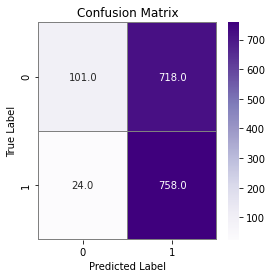

In [31]:
pred = classifier.predict_classes(X_val)
cm = confusion_matrix(y_val,pred)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths = 0.01,cmap="Purples",linecolor = "gray", fmt = '.1f',ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [32]:
test_loss, test_acc = model.evaluate(test_data, test_label)

64/64 [==============================] - 0s 2ms/step - loss: 31.3490 - accuracy: 0.6396


**참고자료**  
  
[Cat/Dog Classifiction using Keras (From Scratch)](https://www.kaggle.com/akashkankariya10/cat-dog-classifiction-using-keras-from-scratch/comments)  